In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from numba import jit
from eofs.xarray import Eof

In [32]:
filename = '/home/ubuntu/data/ds810.0/pr_day_CCSM4_historical_r1i1p1_19550101-19891231.nc'

In [62]:
# Read precipitation data
pr = xr.open_dataset(filename)['pr'].isel(time=slice(0, 730))

In [63]:
pr

<xarray.DataArray 'pr' (time: 730, lat: 192, lon: 288)>
[40366080 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1955-01-01T12:00:00 1955-01-02T12:00:00 ...
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           PRECC + PRECL and unit conversion, CMIP5_table_comment...
    units:             kg m-2 s-1
    original_name:     PRECC,PRECL
    cell_methods:      time: mean (interval: 1 day)
    cell_measures:     area: areacella
    history:           2011-11-07T22:10:53Z altered by CMOR: Reordered dimens...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [64]:
# Create an EOF solver to do the EOF analysis. 
# Square-root of cosine of latitude weights are applied before the 
# computation of EOFs
coslat = np.cos(np.deg2rad(pr.coords['lat'].values))

In [65]:
wgts = np.sqrt(coslat)[..., np.newaxis]

In [66]:
solver = Eof(pr, weights=wgts)

In [67]:
%matplotlib inline

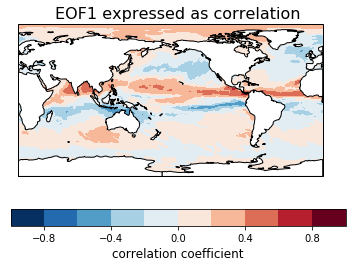

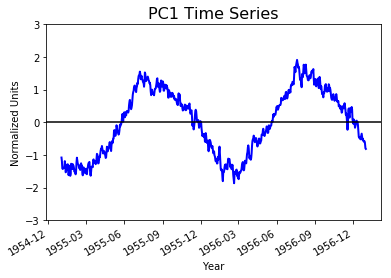

In [68]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(
    ax=ax,
    levels=clevs,
    cmap=plt.cm.RdBu_r,
    add_colorbar=False,
    transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()